<a href="https://colab.research.google.com/github/ljabbie/lj/blob/main/Prob2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2a.

##CSRT-CSTR

Determining the conversion at the exit of the 2nd CSTR.

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [ ]:
X = [0, 0.1, 0.2, 0.4, 0.6, 0.8]  #Conversions
Y = [0.670, 0.720, 0.900, 1.98, 5.06, 8.11]  #FA0/-r(A) [m^3]

Plotting data

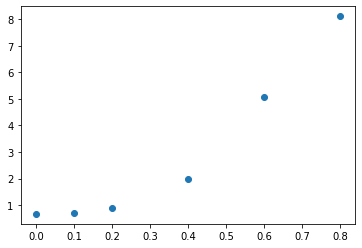

In [ ]:
plt.plot(X,Y,'o')

In [ ]:
X1 = 0.2 # Conversion at the exit of CSTR1
VTOT = 0.5  # Total volume [L]
V1 = X1*.900  # Volume of CSRT1 [L]
V2 = VTOT - V1  # Volume of CSRT2 [L]
print(V1)
print(V2)

0.18000000000000002
0.31999999999999995


In [ ]:
f = interp1d(X, Y, 'slinear')  #Interpolating the data

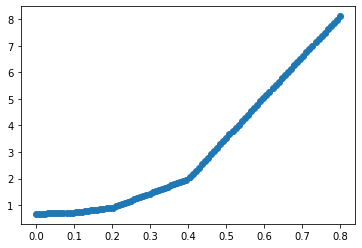

In [ ]:
list_of_X = np.linspace(0, 0.8, 100)
list_of_Y = f(list_of_X)

plt.plot(list_of_X, list_of_Y, '-o')


In [ ]:
def find_X2(f, V2, X1, V1):
    x = np.linspace(X1, 0.8, 1000)
    xout = 0.0
    for xtmp in x: 
        V_tmp = (f(xtmp) - V1)*(xtmp-X1)  # Computing volume for each x
        if V_tmp >= V2: # Volume matches
            xout = xtmp # Conversion desired
            break
    return xout

In [ ]:
X_out_of_CSTR_2 = find_X2(f, V2, X1, V1)
X_out_of_CSTR_2

0.3861861861861862

##CSTR-PFR

Finding the conversion at PFR exit

In [ ]:
v_cstr = 0.18 # [L]
v_pfr = 0.32  # [L]


In [ ]:
x_2= [0.2, 0.4] #Conversion to get the lower bound volume for interpolation
y_2=[0.900, 1.98] # Correspoing FAO/-rA values [m^3]
v1= np.trapz(y_2,x_2, dx = 0.2)  # Volume between x=.2 and x=.4
print(v1)


0.288


In [ ]:
x_lbv = 0.4  # conversion at lower bound volume
y_lbv = 1.98  #corresponding value
deltaV= v_pfr-v1 
print(deltaV)

0.03200000000000003


In [ ]:
def find_X2(f, v_pfr,x_lbv , y_lbv):
    x = np.linspace(X1, 0.8, 1000)
    xout = 0.0
    for xpfr in x: 
        V_pfr = 0.5*(f(xpfr) + 1.98)*(xpfr-0.4)  # Computing volume for each x
        if V_pfr >= deltaV: # Volume matches
            xout = xpfr # Conversion desired
            break
    return xout

In [ ]:
X_out_of_PFR = find_X2(f, v_pfr, x_lbv, y_lbv)
X_out_of_PFR

0.41561561561561566

##PFR-PFR

Determining the conversion of the 2nd PFR.

In [ ]:
x_3= [0, 0.1, 0.2] #Conversion
y_3= [0.670, 0.720, 0.900]
V_pfr1= np.trapz(y_3,x_3, dx = 0.1) # [L]
print(V_pfr1)

0.15050000000000002


In [ ]:
V_pfr2 = VTOT- V_pfr1 #[L]

In [ ]:
x_3=x_2
y_3=y_2
v3=v1
deltaV1 = V_pfr2 - v3
print(V_pfr2)
print(deltaV1)

0.3495
0.0615


In [ ]:
def find_X2(f, v_pfr,x_lbv , y_lbv):
    x = np.linspace(X1, 0.8, 1000)
    xout = 0.0
    for xpfr1 in x: 
        V_pfr = 0.5*(f(xpfr1) + 1.98)*(xpfr1-0.4)  # Computing volume for each x
        if V_pfr >= deltaV1: # Volume matches
            xout = xpfr1 # Conversion desired
            break
    return xout

In [ ]:
X_out_of_PFR1 = find_X2(f, v_pfr, x_lbv, y_lbv)
X_out_of_PFR1

0.42822822822822826

#PFR-CSTR

In [ ]:
v_1st =V_pfr1
v_2cstr = V_pfr2

In [ ]:
def find_X2(f, v_2cstr, X1, v_1st):
    x = np.linspace(X1, 0.8, 1000)
    xout = 0.0
    for xtmp in x: 
        V_tmp = (f(xtmp) - V1)*(xtmp-X1)  # Computing volume for each x
        if V_tmp >= v_2cstr: # Volume matches
            xout = xtmp # Conversion desired
            break
    return xout

In [ ]:
X_out_of_CSTR1 = find_X2(f, v_2cstr, X1, v_1st)
X_out_of_CSTR1

0.39459459459459467